# Imports

In [25]:
import warnings

import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster       import KMeans, MeanShift, estimate_bandwidth, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer

## Functions

In [2]:
random_state = 42
np.random.seed(random_state)

warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = 500

# Loading Dataset

In [3]:
df = pd.read_excel('../data/raw/Dry_Bean_Dataset.xlsx')

In [4]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Data Dimensions

In [5]:
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Cols: {}'.format(df.shape[1]))

Number of Rows: 13611
Number of Cols: 17


## Check NA

In [6]:
df.isna().mean()

Area               0.0
Perimeter          0.0
MajorAxisLength    0.0
MinorAxisLength    0.0
AspectRation       0.0
Eccentricity       0.0
ConvexArea         0.0
EquivDiameter      0.0
Extent             0.0
Solidity           0.0
roundness          0.0
Compactness        0.0
ShapeFactor1       0.0
ShapeFactor2       0.0
ShapeFactor3       0.0
ShapeFactor4       0.0
Class              0.0
dtype: float64

# Feature Engineering

## Rescaling

In [7]:
X = df.drop('Class', axis=1)

In [8]:
ss = StandardScaler()
X.loc[:, :] = ss.fit_transform(X)

## PCA

In [32]:
X_pca = X.copy()

pca = PCA()
X_pca.loc[:, :] = pca.fit_transform(X)

In [33]:
pca.explained_variance_.round(2)

array([8.88, 4.23, 1.28, 0.82, 0.44, 0.18, 0.11, 0.05, 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  ])

In [35]:
X_pca2 = X_pca.copy()

pca = PCA(n_components=3)
X_pca2 = pca.fit_transform(X)

# Machine Learning

## KMeans

In [9]:
kmeans = KMeans(n_clusters=7, random_state=random_state)
y = kmeans.fit_predict(X)

In [10]:
y

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

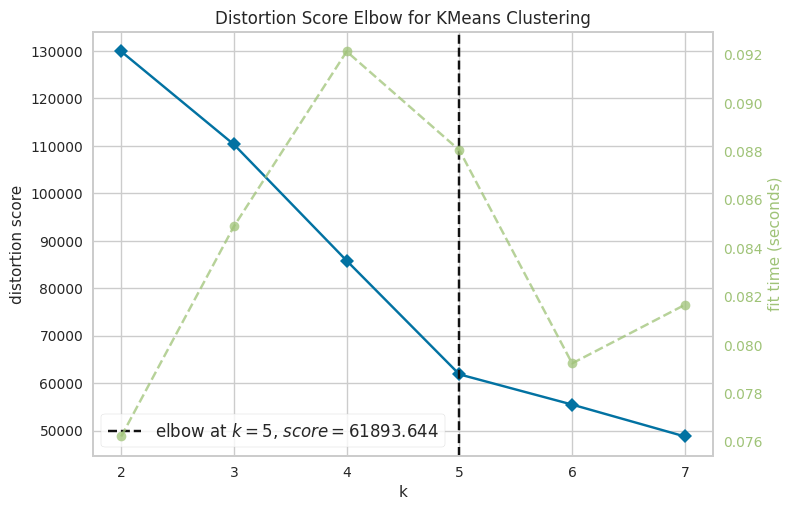

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
kmeans_yellow = KMeans(random_state=random_state)

elbow_graph = KElbowVisualizer(kmeans_yellow, k=(2, 8))
elbow_graph.fit(X)
elbow_graph.show()

## MeanShift

In [14]:
bw = estimate_bandwidth(X)
bw

3.688645168859493

In [15]:
mean_shift = MeanShift(bandwidth=bw)
mean_shift.fit(X)

MeanShift(bandwidth=3.688645168859493)

In [16]:
y = mean_shift.predict(X)

## DBSCAN

In [20]:
dbscan = DBSCAN(eps=1.20, min_samples=2)
dbscan.fit(X)

DBSCAN(eps=1.2, min_samples=2)

In [21]:
y = dbscan.labels_

In [22]:
y

array([0, 0, 0, ..., 0, 0, 0])